In [2]:
# Dependencies
import pandas as pd
import numpy as np
import json 
import requests
import matplotlib.pyplot as plt
from citipy import citipy
from config import api_key
from scipy.stats import linregress
from sklearn import datasets

In [3]:
# Generate latitudes and longitudes using random number generator and multiply by 100
#cities_df=pd.DataFrame({"long":(np.random.random_sample(1000)*100), "lat":(np.random.random_sample(1000)*100)})
cities_df=pd.DataFrame({"long":(np.random.uniform(-1.8,1.8,1200)*100), "lat":(np.random.uniform(-0.9,0.9,1200)*100)})

cities_df.head()

,long,lat
0,34.475316,25.681737
1,113.387312,-19.979173
2,31.611049,-24.007262
3,93.626805,56.877440
4,-56.287342,78.067266


In [4]:
cities_name=[]
countrycode=[]
for i in range(0,len(cities_df['lat'])):
    lat=cities_df.iloc[i]['lat']
    long=cities_df.iloc[i]["long"]
    city=citipy.nearest_city(lat,long)
    name=city.city_name
    cities_name.append(name)
    country=city.country_code
    countrycode.append(country)
    
cities_df['City']=cities_name
cities_df['Country']=countrycode
cities_df['Temperature']=""
cities_df['Max. Temperature']=""
cities_df['Humidity'] =""
cities_df['Cloudiness'] =""
cities_df['Wind'] =""
cities_df.head()

,long,lat,City,Country,Temperature,Max. Temperature,Humidity,Cloudiness,Wind
0,34.475316,25.681737,safaga,eg,,,,,
1,113.387312,-19.979173,karratha,au,,,,,
2,31.611049,-24.007262,phalaborwa,za,,,,,
3,93.626805,56.877440,predivinsk,ru,,,,,
4,-56.287342,78.067266,upernavik,gl,,,,,


In [5]:
#Remove duplicates
new_cities = cities_df.drop_duplicates("City", keep='first')

In [6]:
#Make sure we have 500+ cities in the data frame
len(new_cities)

537

In [7]:
new_cities.to_html

<bound method DataFrame.to_html of             long        lat           City Country Temperature  \
0      34.475316  25.681737         safaga      eg               
1     113.387312 -19.979173       karratha      au               
2      31.611049 -24.007262     phalaborwa      za               
3      93.626805  56.877440     predivinsk      ru               
4     -56.287342  78.067266      upernavik      gl               
...          ...        ...            ...     ...         ...   
1182  123.444846  43.024667    zhengjiatun      cn               
1189  -96.321335  26.260669    brownsville      us               
1193   80.094861  26.603188         bithur      in               
1197  -57.656291 -33.175344       mercedes      uy               
1198  -58.982766 -21.076852  fuerte olimpo      py               

     Max. Temperature Humidity Cloudiness Wind  
0                                               
1                                               
2                        

In [179]:
# Loop through the cities_pd and run a weather search for each city
for index, row in new_cities.iterrows():
        target_url="http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&mode=json&APPID=%s" % (row["City"].replace(" ","+"), api_key)
        cities_weather = requests.get(target_url).json()
        print(target_url)
        try:
            new_cities.set_value(index, "Temperature", cities_weather["main"]["temp"])
            new_cities.set_value(index, "Max. Temperature", cities_weather["main"]["temp_max"])
            new_cities.set_value(index, "Humidity", cities_weather["main"]["humidity"])
            new_cities.set_value(index, "Cloudiness", cities_weather["clouds"]["all"])
            new_cities.set_value(index, "Wind", cities_weather["wind"]["speed"])
        except:
            print("Missing city weather data.......skipping")


http://api.openweathermap.org/data/2.5/weather?q=codrington&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=pevek&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed 

http://api.openweathermap.org/data/2.5/weather?q=punta+arenas&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=albany&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=portland&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=port+alfred&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.

http://api.openweathermap.org/data/2.5/weather?q=upington&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=belushya+guba&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=kralendijk&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=miri&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=rach+gia&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=jamestown&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=banda+aceh&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=henties+bay&units=IMPERIAL&mode=json&APPID=59a80f5

http://api.openweathermap.org/data/2.5/weather?q=hammerfest&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=thompson&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=maxixe&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=new+norfolk&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=saleaula&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=liverpool&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=kuito&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=dikson&units=IMPERIAL&mode=json&APPID=59a80f55a501475ef

http://api.openweathermap.org/data/2.5/weather?q=port+augusta&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=nanortalik&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=usak&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=khasan&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=port+lincoln&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=jalu&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=khandyga&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=matay&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?q=zhigansk&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=sabang&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=calvia&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=cabo+san+lucas&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=ahipara&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=westport&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=narsaq&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=kloulklubed&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweather

http://api.openweathermap.org/data/2.5/weather?q=kyren&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=vestmannaeyjar&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=ponta+do+sol&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=daxian&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=ikalamavony&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=alotau&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=oktyabrskoye&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=norte

http://api.openweathermap.org/data/2.5/weather?q=pokrovsk&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=ancud&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=salacgriva&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=kosum+phisai&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=grand+river+south+east&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=payo&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=aripuana&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=isangel&units=IMPERIAL&mode=json&APPID=59a8

http://api.openweathermap.org/data/2.5/weather?q=mabaruma&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=poum&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=pochutla&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=novopokrovskaya&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=karakol&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=ust-kamchatsk&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=krasnohrad&units=IMPERIAL&mode=json&APPID=59a80f55a501475efaa5ff7358294b84
http://api.openweathermap.org/data/2.5/weather?q=kuche&units=IMPERIAL&mode=json&APPID=59a80f55a5

In [ ]:
# Build query URL and request your results in Celsius
#query_url = f"{url}appid={api_key}&q={city}&units={units}"

# Get weather data
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

In [180]:
#Print JSON response
print(cities_weather)

{'coord': {'lon': 132.56, 'lat': 33.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 53.6, 'feels_like': 38.21, 'temp_min': 53.6, 'temp_max': 53.6, 'pressure': 1013, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 21.92, 'deg': 260}, 'clouds': {'all': 20}, 'dt': 1583895337, 'sys': {'type': 1, 'id': 8031, 'country': 'JP', 'sunrise': 1583875533, 'sunset': 1583918053}, 'timezone': 32400, 'id': 1926020, 'name': 'Uwajima', 'cod': 200}


In [181]:
#Show new cities dataframe

new_cities.head()

,long,lat,City,Country,Temperature,Max. Temperature,Humidity,Cloudiness,Wind
0,-60.738055,18.659174,codrington,ag,68.61,68.61,73,5,15.03
1,167.821605,83.043046,pevek,ru,-13.14,-13.14,94,32,3.44
2,-83.200078,-73.627297,punta arenas,cl,46.2,46.4,75,75,8.05
3,116.605032,-54.536078,albany,au,46.6,53.01,87,90,14.99
5,82.732266,-18.480157,hithadhoo,mv,83.12,83.12,74,100,10.74


In [182]:
# Turn columns to numeric because of empty rows
new_cities["Temperature"] = pd.to_numeric(new_cities["Temperature"], errors='coerce')
new_cities["Max. Temperature"] = pd.to_numeric(new_cities["Max. Temperature"], errors='coerce')
new_cities["Humidity"] = pd.to_numeric(new_cities["Humidity"], errors='coerce')
new_cities["Cloudiness"] = pd.to_numeric(new_cities["Cloudiness"], errors='coerce')
new_cities["Wind"] = pd.to_numeric(new_cities["Wind"], errors='coerce')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [183]:
#Save dataframe to csv
new_cities.to_csv("world_cities_weather.csv", encoding="utf-8", index=False)

In [184]:
new_cities = new_cities.dropna()


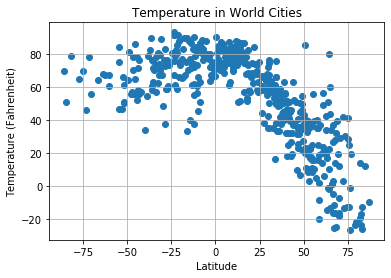

In [185]:
# Build a scatter plot for each data type
#Temperature (F) vs. Latitude
plt.scatter(new_cities["lat"], new_cities["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

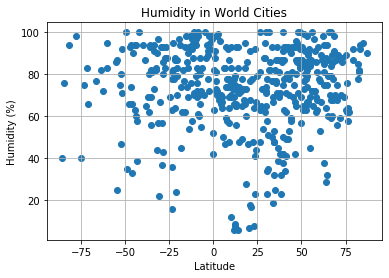

In [186]:
#Humidity (%) vs. Latitude
plt.scatter(new_cities["lat"], new_cities["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

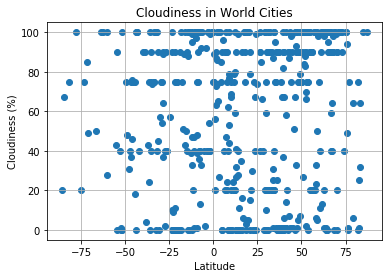

In [187]:
#Cloudiness (%) vs. Latitude
plt.scatter(new_cities["lat"], new_cities["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

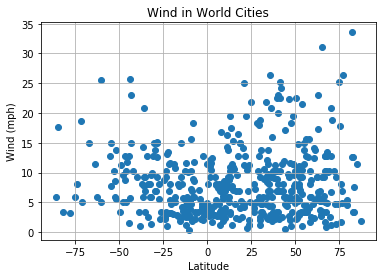

In [188]:
#Wind Speed (mph) vs. Latitude
plt.scatter(new_cities["lat"], new_cities["Wind"], marker="o")

# Incorporate the other graph properties
plt.title("Wind in World Cities")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

# Show plot
plt.show()

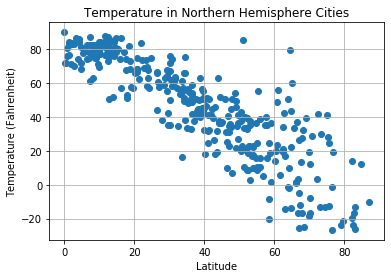

In [189]:
#Northern Hemisphere - Temperature (F) vs. Latitude
# Dependencies
from scipy.stats import linregress
from sklearn import datasets

#create new dataframe
northern_hemisphere = new_cities.loc[(new_cities["lat"] > 0), :]


#plt.plot(northern_hemisphere["lat"] , northern_hemisphere["Temperature"])
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Temperature']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("Temperature in Northern Hemisphere Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("NHem_TemperatureInWorldCities.png")

# Show plot
plt.show()

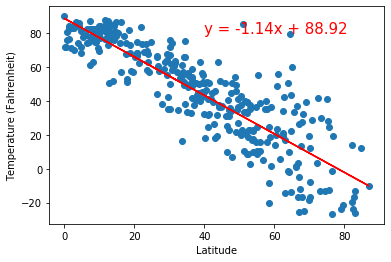

In [190]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,80),fontsize=15,color="red")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.show()

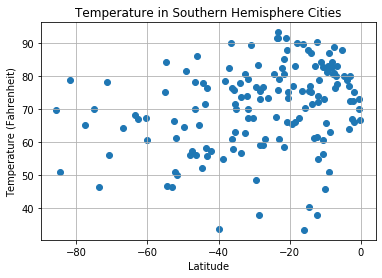

In [191]:
#Southern Hemisphere - Temperature (F) vs. Latitude

#create new dataframe
southern_hemisphere = new_cities.loc[(new_cities["lat"] < 0), :]


#plt.plot(southern_hemisphere["lat"] , southern_hemisphere["Temperature"])
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Temperature']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("Temperature in Southern Hemisphere Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("SHem_TemperatureInWorldCities.png")

# Show plot
plt.show()

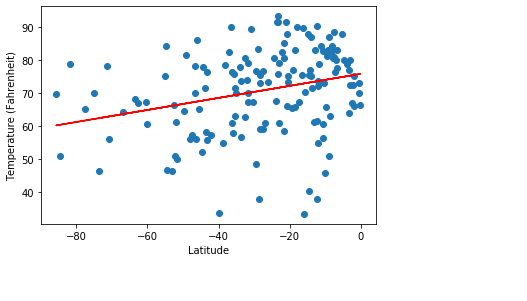

In [192]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.show()

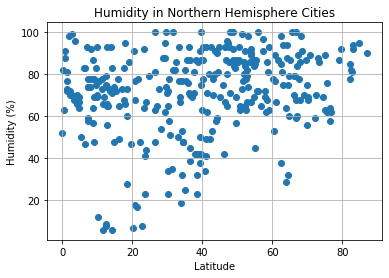

In [193]:
#Northern Hemisphere - Humidity (%) vs. Latitude

#create new dataframe
northern_hemisphere = new_cities.loc[(new_cities["lat"] > 0), :]
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Humidity']
plt.scatter(x_values,y_values)

#plt.plot(northern_hemisphere["lat"] , northern_hemisphere["Humidity"])

# Incorporate the other graph properties
plt.title("Humidity in Northern Hemisphere Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("NHem_HumidityInWorldCities.png")

# Show plot
plt.show()

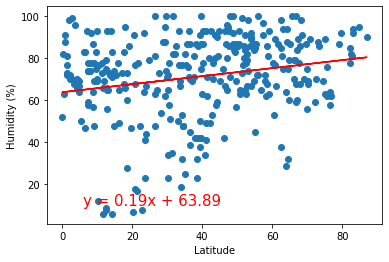

In [194]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()

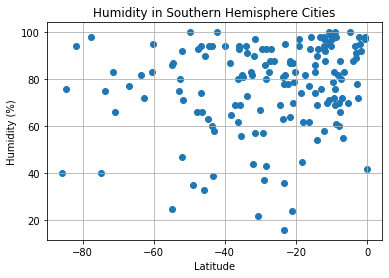

In [195]:
#Southern Hemisphere - Humidity (%) vs. Latitude

#create new dataframe
southern_hemisphere = new_cities.loc[(new_cities["lat"] < 0), :]
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Humidity']
plt.scatter(x_values,y_values)

#plt.plot(southern_hemisphere["lat"] , southern_hemisphere["Humidity"])

# Incorporate the other graph properties
plt.title("Humidity in Southern Hemisphere Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("SHem_HumidityInWorldCities.png")

# Show plot
plt.show()

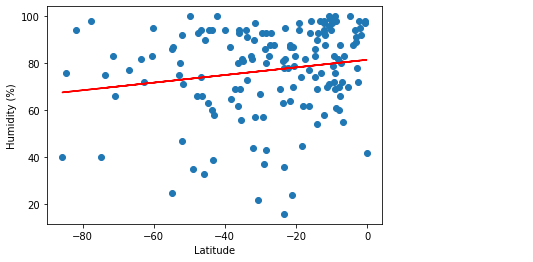

In [196]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()

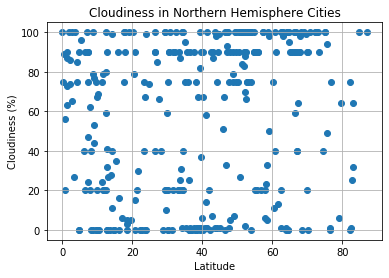

In [197]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude

#create new dataframe
northern_hemisphere = new_cities.loc[(new_cities["lat"] > 0), :]
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Cloudiness']
plt.scatter(x_values,y_values)


#plt.plot(northern_hemisphere["lat"] , northern_hemisphere["Cloudiness"])

# Incorporate the other graph properties
plt.title("Cloudiness in Northern Hemisphere Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("NHem_CloudinessInWorldCities.png")

# Show plot
plt.show()

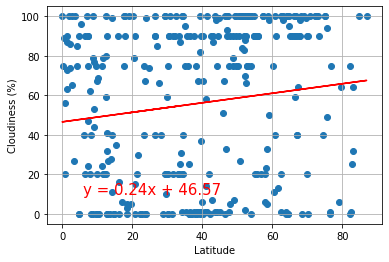

In [198]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [199]:
len(new_cities)

475

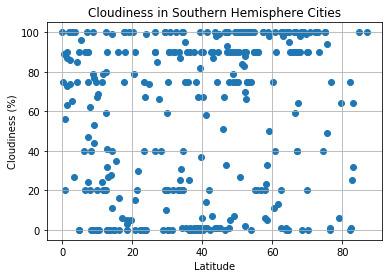

In [200]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

#create new dataframe
southern_hemisphere = new_cities.loc[(new_cities["lat"] > 0), :]
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Cloudiness']
plt.scatter(x_values,y_values)

#plt.plot(southern_hemisphere["lat"] , southern_hemisphere["Cloudiness"])

# Incorporate the other graph properties
plt.title("Cloudiness in Southern Hemisphere Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("SHem_CloudinessInWorldCities.png")

# Show plot
plt.show()

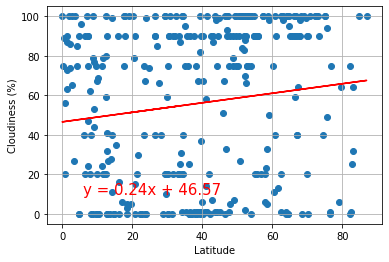

In [201]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

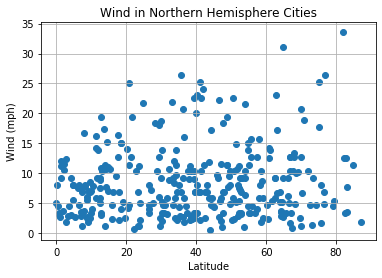

In [202]:
#Northern Hemisphere - Wind (mph) vs. Latitude

#create new dataframe
northern_hemisphere = new_cities.loc[(new_cities["lat"] > 0), :]
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Wind']
plt.scatter(x_values,y_values)

#plt.plot(northern_hemisphere["lat"] , northern_hemisphere["Wind"])

# Incorporate the other graph properties
plt.title("Wind in Northern Hemisphere Cities")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("NHem_WindInWorldCities.png")

# Show plot
plt.show()

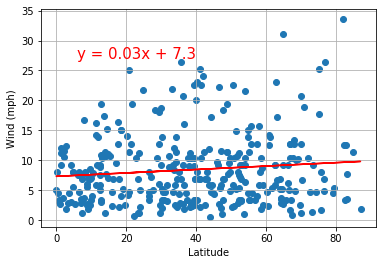

In [203]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,27),fontsize=15,color="red")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

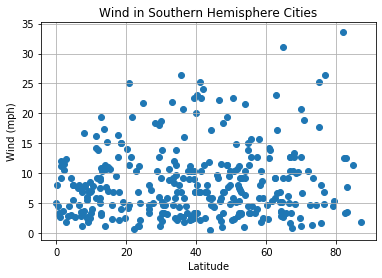

In [204]:
#Southern Hemisphere - Wind (mph) vs. Latitude

#create new dataframe
southern_hemisphere = new_cities.loc[(new_cities["lat"] > 0), :]
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Wind']
plt.scatter(x_values,y_values)

#plt.plot(southern_hemisphere["lat"] , southern_hemisphere["Wind"])

# Incorporate the other graph properties
plt.title("Wind in Southern Hemisphere Cities")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("SHem_WindInWorldCities.png")

# Show plot
plt.show()

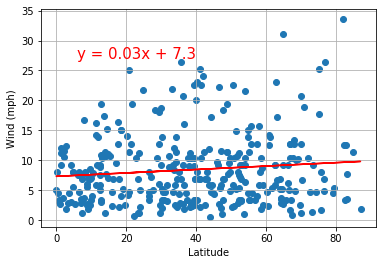

In [205]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,27),fontsize=15,color="red")
plt.ylabel("Wind (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()